In [129]:
# Cell 1: imports & paths (Junta de Andalucia)
import pandas as pd, matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
from pathlib import Path
PROC = Path("../data/processed")
FIG  = Path("../figures"); FIG.mkdir(parents=True, exist_ok=True)
RAW  = Path("../data/raw")

In [130]:
# Cell 2: load processed tables
alides_pct  = pd.read_csv(PROC / "esoc2023_alides_motivos_pct.csv")
medidas_pct = pd.read_csv(PROC / "esoc2023_medidas_pct.csv")

# optional labels from dictionary
dicc_path = RAW / "132-encuesta-social-consumo-y-sostenibilidad-diseno-registro-ESOC2023_limpio.xls"
if dicc_path.exists():
    dicc = pd.read_excel(dicc_path)
    name_to_desc = dicc.set_index("Nombre")["Descripción"].to_dict()
else:
    dicc = None; name_to_desc = {}

# attach human labels (fallback manual for medidas)
alides_pct["label"]  = alides_pct["variable"].map(name_to_desc).fillna(alides_pct["variable"])
manual_labels = {
    "medida1":"Donate/sell items for reuse","medida2":"Use rechargeable batteries",
    "medida3":"Bring own bag/trolley","medida4":"Avoid plastic/excess packaging",
    "medida5":"Repair appliances/devices","medida6":"Repair clothes/shoes",
    "medida7":"Other","medida8":"None"
}
medidas_pct["label"] = medidas_pct["variable"].map(name_to_desc).fillna(
    medidas_pct["variable"].map(manual_labels).fillna(medidas_pct["variable"])
)


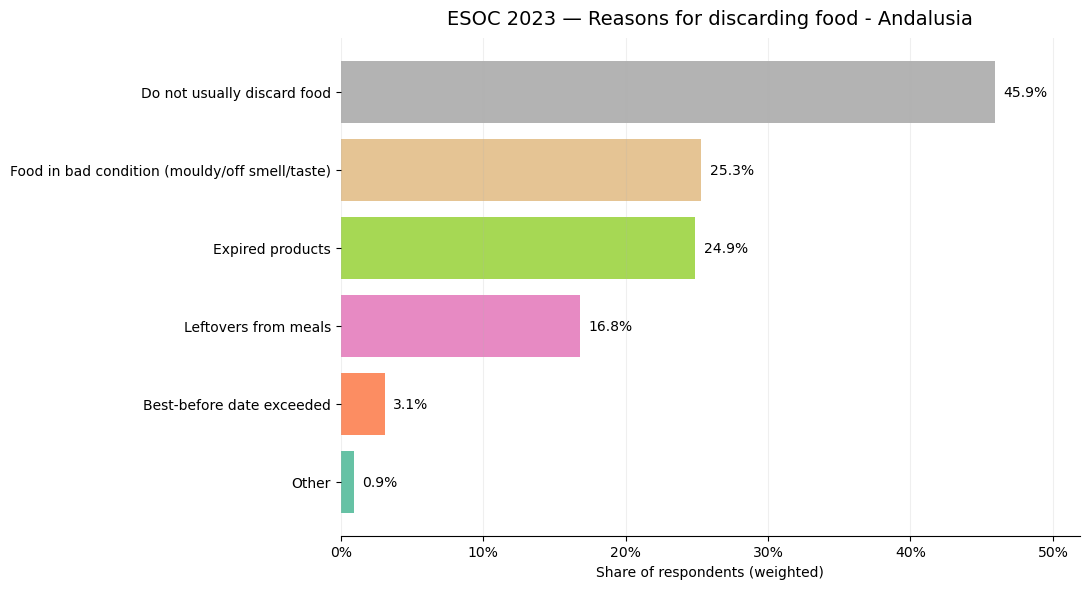

In [131]:
# Cell 3: plot — Reasons for discarding food (ranking)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# --- 1) English labels (manual mapping by variable name) ---
en_map = {
    "alides6": "Do not usually discard food",
    "alides2": "Food in bad condition (mouldy/off smell/taste)",
    "alides1": "Expired products",
    "alides4": "Leftovers from meals",
    "alides3": "Best-before date exceeded",
    "alides5": "Other",
}

plot_df = (
    alides_pct
    .dropna(subset=["pct"])
    .assign(en_label=lambda d: d["variable"].map(en_map).fillna(d.get("label", d["variable"])))
    .sort_values("pct", ascending=True)
)

# --- 2) Colors & layout ---
colors = plt.cm.Set2(np.linspace(0, 1, len(plot_df)))   # more colorful bars
max_pct = float(plot_df["pct"].max())
x_margin = 6                                            # right margin so text never clips

fig, ax = plt.subplots(figsize=(11, 6))
bars = ax.barh(plot_df["en_label"], plot_df["pct"], color=colors)

# --- 3) Value labels (place slightly outside the bar) ---
for i, (v, b) in enumerate(zip(plot_df["pct"], bars)):
    ax.text(v + 0.6,                                   # a bit to the right of the bar
            b.get_y() + b.get_height()/2,
            f"{v:.1f}%",
            va="center", ha="left")

# --- 4) Styling ---
ax.set_xlim(0, max_pct + x_margin)                     # space so labels don't touch the frame
ax.set_title("ESOC 2023 — Reasons for discarding food - Andalusia", fontsize=14, pad=10)
ax.set_xlabel("Share of respondents (weighted)")
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))
ax.grid(axis="x", alpha=0.2)
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Save for README
Path("../figures").mkdir(parents=True, exist_ok=True)
fig.savefig("../figures/Reasons_for_discarding_food_and.png", dpi=150)  

plt.tight_layout()
plt.show()


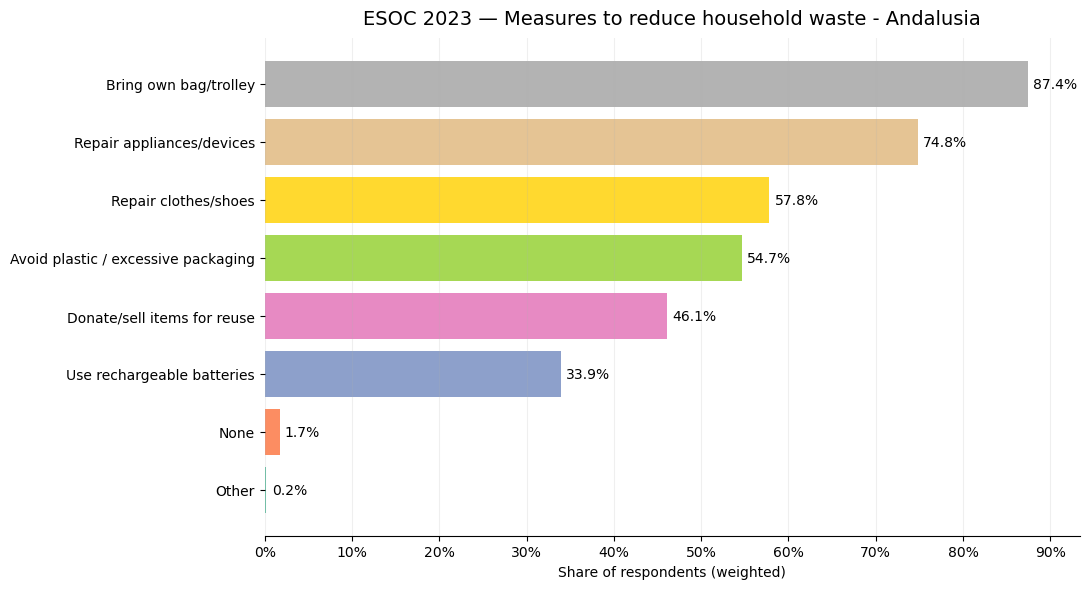

In [132]:
# Cell 4: plot — Measures to reduce household waste (ranking)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# --- English labels for medida1..8 ---
en_measures = {
    "medida1": "Donate/sell items for reuse",
    "medida2": "Use rechargeable batteries",
    "medida3": "Bring own bag/trolley",
    "medida4": "Avoid plastic / excessive packaging",
    "medida5": "Repair appliances/devices",
    "medida6": "Repair clothes/shoes",
    "medida7": "Other",
    "medida8": "None",
}

# Build plotting DF (expects medidas_pct with columns ['variable','pct'])
plot_df = (
    medidas_pct
    .dropna(subset=["pct"])
    .assign(en_label=lambda d: d["variable"].map(en_measures).fillna(d.get("label", d["variable"])))
    .sort_values("pct", ascending=True)
)

# Colors & margins
colors  = plt.cm.Set2(np.linspace(0, 1, len(plot_df)))
max_pct = float(plot_df["pct"].max())
x_margin = 6  # extra right margin so labels never clip

fig, ax = plt.subplots(figsize=(11, 6))
bars = ax.barh(plot_df["en_label"], plot_df["pct"], color=colors)

# Value labels outside bars
for v, b in zip(plot_df["pct"], bars):
    ax.text(v + 0.6, b.get_y() + b.get_height()/2, f"{v:.1f}%", va="center", ha="left")

# Styling
ax.set_xlim(0, max_pct + x_margin)
ax.set_title("ESOC 2023 — Measures to reduce household waste - Andalusia", fontsize=14, pad=10)
ax.set_xlabel("Share of respondents (weighted)")
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))
ax.grid(axis="x", alpha=0.2)
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Save for README
Path("../figures").mkdir(parents=True, exist_ok=True)
fig.savefig("../figures/Measures_to_reduce_household_waste_and.png", dpi=150)    
    
plt.tight_layout()
plt.show()



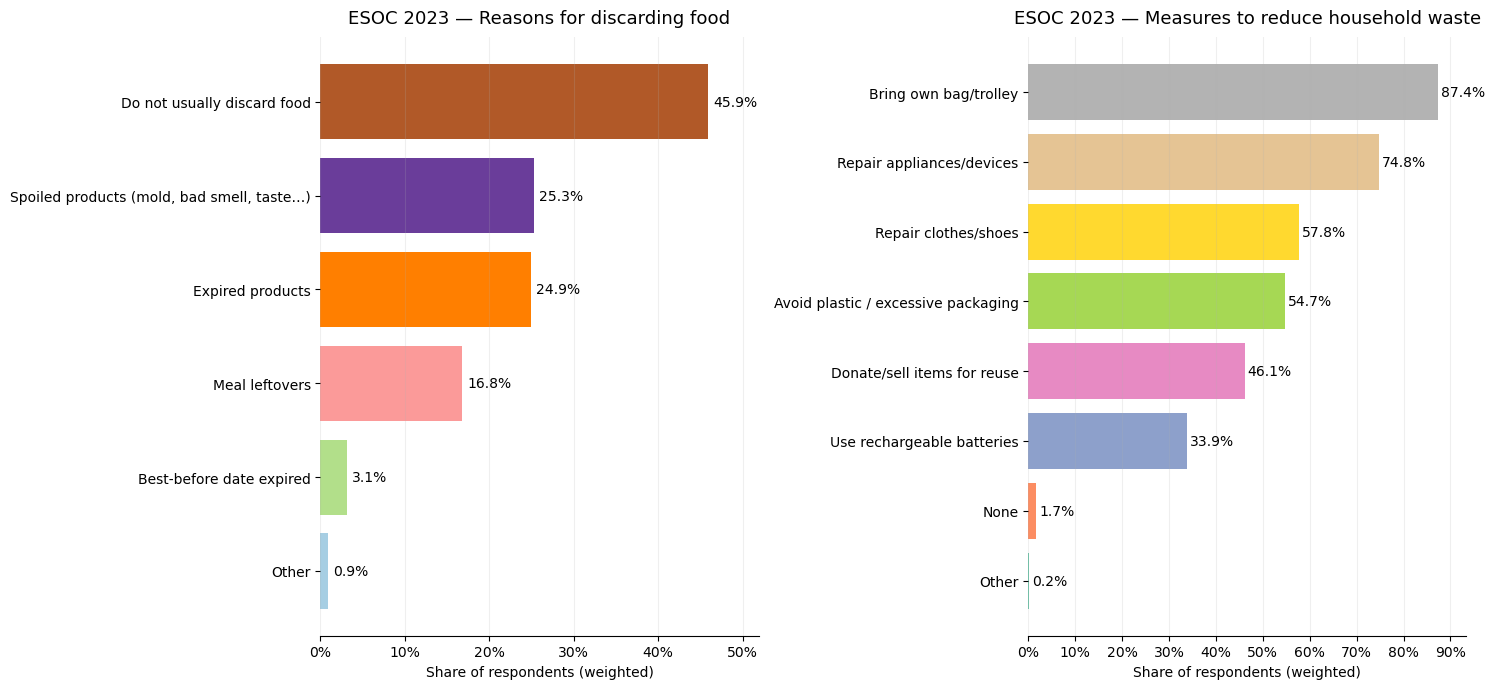

In [133]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
from pathlib import Path

PROC = Path("../data/processed")

# Ensure we load processed tables
alides_pct  = pd.read_csv(PROC / "esoc2023_alides_motivos_pct.csv")   # <- motivos: alides1..6
medidas_pct = pd.read_csv(PROC / "esoc2023_medidas_pct.csv")

# English labels
en_reasons = {
    "alides6": "Do not usually discard food",
    "alides2": "Spoiled products (mold, bad smell, taste…)",
    "alides1": "Expired products",
    "alides4": "Meal leftovers",
    "alides3": "Best-before date expired",
    "alides5": "Other",
}
en_measures = {
    "medida1": "Donate/sell items for reuse",
    "medida2": "Use rechargeable batteries",
    "medida3": "Bring own bag/trolley",
    "medida4": "Avoid plastic / excessive packaging",
    "medida5": "Repair appliances/devices",
    "medida6": "Repair clothes/shoes",
    "medida7": "Other",
    "medida8": "None",
}

# Build plotting dataframes (use alides_pct for reasons!)
reasons_df = (
    alides_pct.dropna(subset=["pct"])
              .assign(en_label=lambda d: d["variable"].map(en_reasons).fillna(d["variable"]))
              .sort_values("pct", ascending=True)
)
measures_df = (
    medidas_pct.dropna(subset=["pct"])
               .assign(en_label=lambda d: d["variable"].map(en_measures).fillna(d["variable"]))
               .sort_values("pct", ascending=True)
)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=False)

# Colors
colors_left  = plt.cm.Paired(np.linspace(0, 1, len(reasons_df)))
colors_right = plt.cm.Set2(np.linspace(0, 1, len(measures_df)))

# Left: Reasons for discarding food (from alides_pct)
bars1 = axes[0].barh(reasons_df["en_label"], reasons_df["pct"], color=colors_left)
max1 = float(reasons_df["pct"].max())
for v, b in zip(reasons_df["pct"], bars1):
    axes[0].text(v + 0.6, b.get_y() + b.get_height()/2, f"{v:.1f}%", va="center", ha="left")
axes[0].set_xlim(0, max1 + 6)
axes[0].set_title("ESOC 2023 — Reasons for discarding food", fontsize=13, pad=10)
axes[0].set_xlabel("Share of respondents (weighted)")
axes[0].xaxis.set_major_locator(MultipleLocator(10))
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))
axes[0].grid(axis="x", alpha=0.2)
for sp in ["top", "right", "left"]:
    axes[0].spines[sp].set_visible(False)

# Right: Measures to reduce household waste
bars2 = axes[1].barh(measures_df["en_label"], measures_df["pct"], color=colors_right)
max2 = float(measures_df["pct"].max())
for v, b in zip(measures_df["pct"], bars2):
    axes[1].text(v + 0.6, b.get_y() + b.get_height()/2, f"{v:.1f}%", va="center", ha="left")
axes[1].set_xlim(0, max2 + 6)
axes[1].set_title("ESOC 2023 — Measures to reduce household waste", fontsize=13, pad=10)
axes[1].set_xlabel("Share of respondents (weighted)")
axes[1].xaxis.set_major_locator(MultipleLocator(10))
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))
axes[1].grid(axis="x", alpha=0.2)
for sp in ["top", "right", "left"]:
    axes[1].spines[sp].set_visible(False)

plt.tight_layout()
plt.show()

In [134]:
# Import Eurostat
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Rutas ---
datadir = Path("../data/external")
figdir = Path("../figures")
figdir.mkdir(parents=True, exist_ok=True)

# --- Cargar datasets procesados ---
df_es_ue = pd.read_csv(datadir / "eurostat_env_wasmun_ES_UE.csv")       # residuos municipales kg/hab
df_es_ue_pack = pd.read_csv(datadir / "eurostat_env_waspacr_RT_ES_UE.csv")  # reciclaje de envases %

# --- Revisar ---
print("Municipal waste:", df_es_ue.shape)
print("Packaging recycling:", df_es_ue_pack.shape)

df_es_ue.head(), df_es_ue_pack.head()

Municipal waste: (62, 5)
Packaging recycling: (45, 3)


(         geo wst_oper    unit    year  value
 0         ES      GEN  KG_HAB     NaN    240
 1  EU27_2020      GEN  KG_HAB     NaN    241
 2         ES      GEN  KG_HAB     NaN      A
 3  EU27_2020      GEN  KG_HAB     NaN      A
 4         ES      GEN  KG_HAB  1995.0  505.0,
   geo  year  value
 0  ES  1997   33.5
 1  ES  1998   33.6
 2  ES  1999   37.9
 3  ES  2000   39.8
 4  ES  2001   43.6)

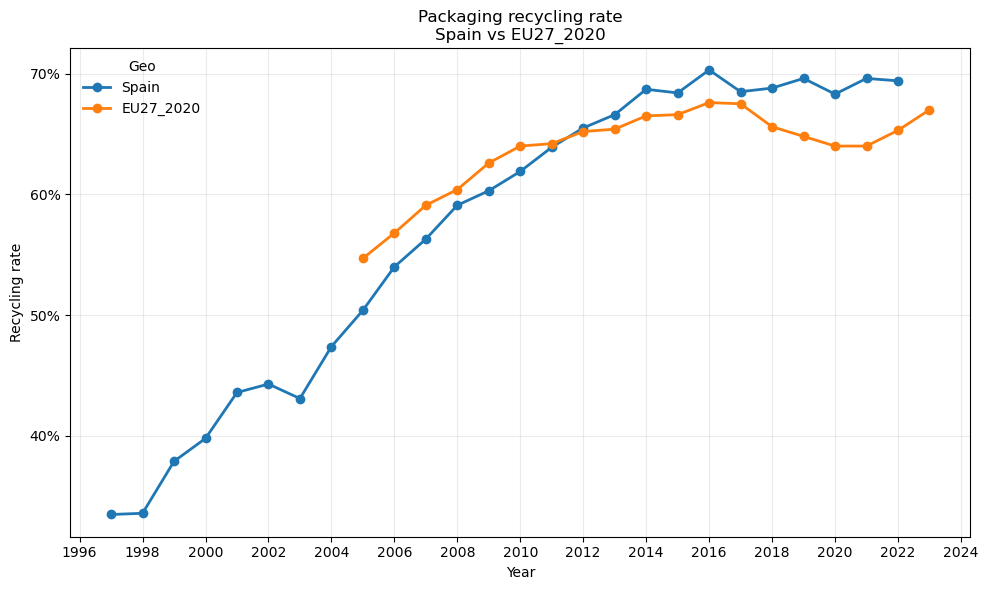

In [135]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
from pathlib import Path

# Ensure data is tidy & ordered
plot_df = (
    df_es_ue_pack
    .dropna(subset=["year","value"])
    .sort_values(["geo","year"])
    .copy()
)

# Nice axis formatting
def pct_fmt(y, _): 
    return f"{y:.0f}%"

fig, ax = plt.subplots(figsize=(10, 6))

for g, label in [("ES", "Spain"), ("EU27_2020", "EU27_2020")]:
    s = plot_df[plot_df["geo"] == g]
    ax.plot(s["year"], s["value"], marker="o", linewidth=2, label=label)

ax.set_title("Packaging recycling rate\nSpain vs EU27_2020")
ax.set_xlabel("Year")
ax.set_ylabel("Recycling rate")

# Format ticks
ax.xaxis.set_major_locator(MultipleLocator(2))     # every 2 years
ax.yaxis.set_major_locator(MultipleLocator(10))    # every 10% on y-axis
ax.yaxis.set_major_formatter(FuncFormatter(pct_fmt))

ax.grid(True, alpha=0.25)
ax.legend(title="Geo", frameon=False)
fig.tight_layout()

# Save for README
Path("../figures").mkdir(parents=True, exist_ok=True)
fig.savefig("../figures/recycling_packaging_es_ue.png", dpi=150)

plt.show()


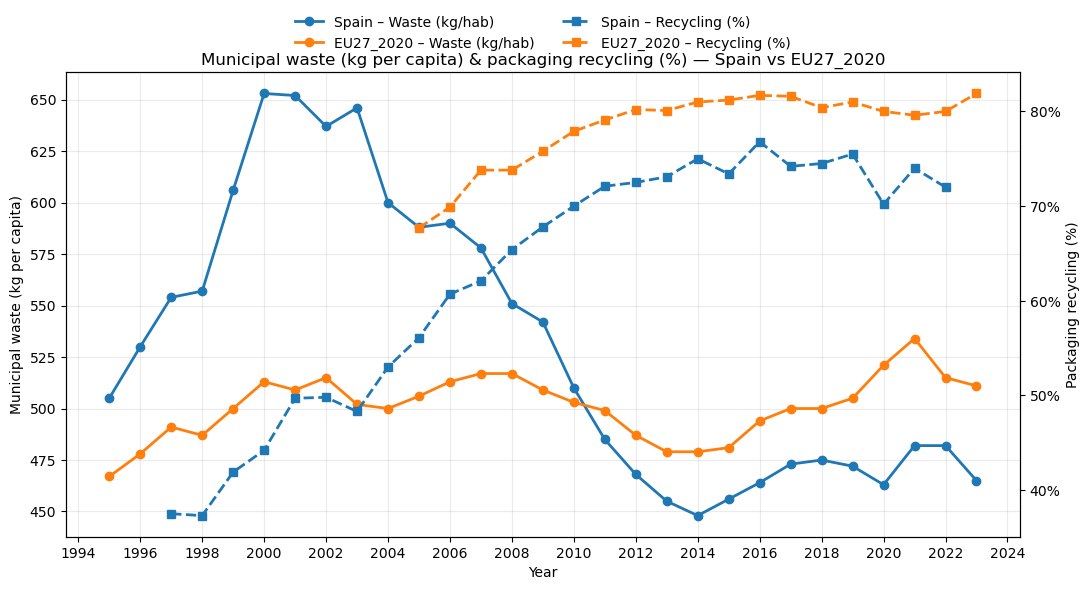

In [136]:
import pandas as pd
import eurostat
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
from pathlib import Path

# ----------------------------
# 1) Pull & tidy BOTH datasets
# ----------------------------
# Municipal waste (kg/hab)
df_env_wasmun = eurostat.get_data_df("env_wasmun", flags=False).reset_index()
df_env_wasmun = df_env_wasmun.rename(columns={"geo\\TIME_PERIOD": "geo"})
year_cols = [c for c in df_env_wasmun.columns if str(c).isdigit()]
df_wasmun_long = df_env_wasmun.melt(
    id_vars=["geo", "wst_oper", "unit"],
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)
df_wasmun_long["year"] = pd.to_numeric(df_wasmun_long["year"], errors="coerce")
df_wasmun_es_ue = df_wasmun_long[
    (df_wasmun_long["geo"].isin(["ES", "EU27_2020"])) &
    (df_wasmun_long["unit"] == "KG_HAB") &
    (df_wasmun_long["wst_oper"] == "GEN")
].rename(columns={"value": "waste_kg_hab"})

# Packaging recycling (%), total packaging W1501, recycled (RCV)
df_env_waspac = eurostat.get_data_df("env_waspac", flags=False).reset_index()
df_env_waspac = df_env_waspac.rename(columns={"geo\\TIME_PERIOD": "geo"})
year_cols2 = [c for c in df_env_waspac.columns if str(c).isdigit()]
df_waspac_long = df_env_waspac.melt(
    id_vars=["geo", "waste", "wst_oper", "unit"],
    value_vars=year_cols2,
    var_name="year",
    value_name="value"
)
df_waspac_long["year"] = pd.to_numeric(df_waspac_long["year"], errors="coerce")
df_waspac_es_ue = df_waspac_long[
    (df_waspac_long["geo"].isin(["ES", "EU27_2020"])) &
    (df_waspac_long["unit"] == "PC") &
    (df_waspac_long["waste"] == "W1501") &
    (df_waspac_long["wst_oper"] == "RCV")
].rename(columns={"value": "recycling_pct"})

# Merge for consistent plotting
df_comb = (
    df_wasmun_es_ue[["geo","year","waste_kg_hab"]]
    .merge(df_waspac_es_ue[["geo","year","recycling_pct"]], on=["geo","year"], how="outer")
    .dropna(subset=["year"])
    .sort_values(["geo","year"])
)

# ----------------------------
# 2) Plot (dual y-axis, pretty)
# ----------------------------
fig, ax1 = plt.subplots(figsize=(11, 6))

# Left axis: municipal waste (kg/hab)
for g, label in [("ES","Spain"), ("EU27_2020","EU27_2020")]:
    s = df_comb[df_comb["geo"] == g]
    ax1.plot(s["year"], s["waste_kg_hab"], marker="o", linewidth=2, label=f"{label} – Waste (kg/hab)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Municipal waste (kg per capita)")
ax1.xaxis.set_major_locator(MultipleLocator(2))    # every 2 years
ax1.yaxis.set_major_locator(MultipleLocator(25))   # 25 kg/hab steps (tune if you prefer 50)
ax1.grid(True, alpha=0.25)

# Right axis: packaging recycling (%)
ax2 = ax1.twinx()
for g, label in [("ES","Spain"), ("EU27_2020","EU27_2020")]:
    s = df_comb[df_comb["geo"] == g]
    ax2.plot(s["year"], s["recycling_pct"], marker="s", linestyle="--", linewidth=2, label=f"{label} – Recycling (%)")
ax2.set_ylabel("Packaging recycling (%)")
ax2.yaxis.set_major_locator(MultipleLocator(10))   # every 10%
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0f}%"))

# Combined legend (above plot, centered, 2 lines if needed)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(
    h1 + h2, l1 + l2,
    loc="upper center",         # posición arriba centrada
    bbox_to_anchor=(0.5, 1.15), # mueve la leyenda fuera del gráfico
    ncol=2,                     # número de columnas (mejora la compactación)
    frameon=False
)

plt.title("Municipal waste (kg per capita) & packaging recycling (%) — Spain vs EU27_2020")
plt.tight_layout()

# Save for README
Path("../figures").mkdir(parents=True, exist_ok=True)
plt.savefig("../figures/waste_and_recycling_es_ue.png", dpi=150)

plt.show()


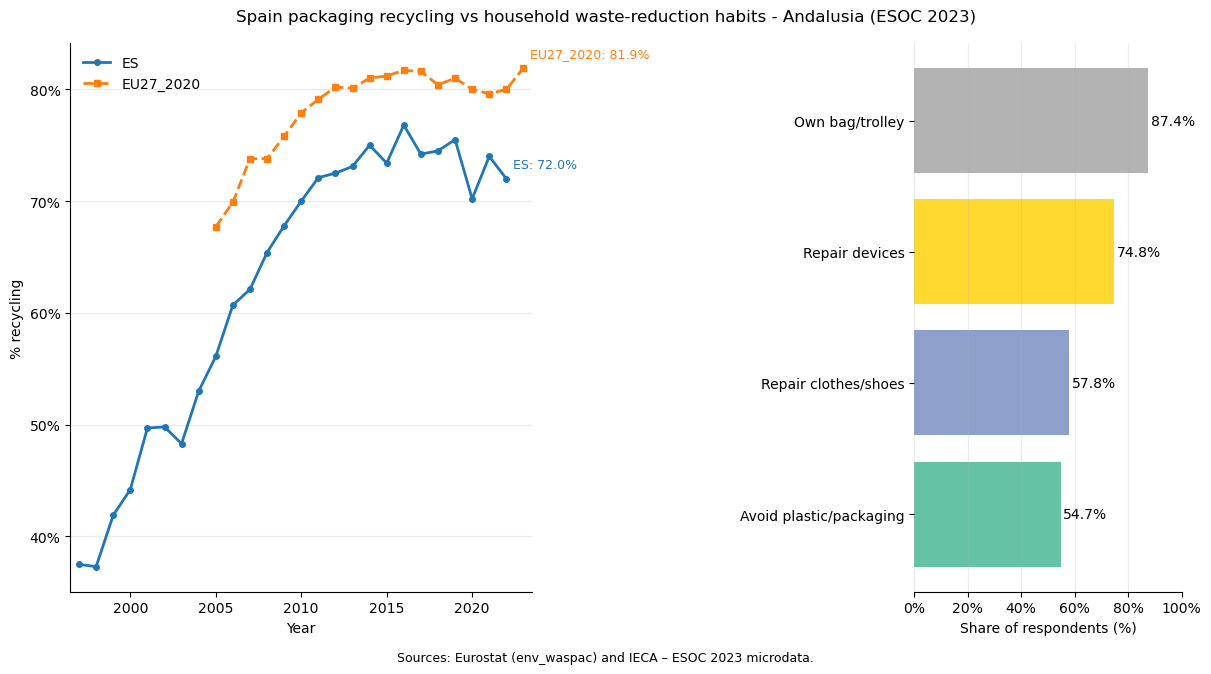

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# --- 0) Asegura tipos del reciclaje (por si vienen como texto) ---
rec = recycling.copy()
rec["year"]  = pd.to_numeric(rec["year"], errors="coerce")
rec["value"] = pd.to_numeric(rec["value"].astype(str).str.replace(",", "."), errors="coerce")
rec = rec.dropna(subset=["year", "value"]).sort_values(["geo", "year"])

# --- 1) Prepara etiquetas cortas para medidas (opcional) ---
if "label_short" not in measures.columns:
    short_map = {
        "Lleva su propia bolsa o carro de la compra": "Own bag/trolley",
        "Repara electrodomésticos y dispositivos electrónicos en lugar de reemplazarlos": "Repair devices",
        "Reparar ropa o zapatos en lugar de reemplazarlos": "Repair clothes/shoes",
        "Evita los artículos de plástico y productos excesivamente empaquetados": "Avoid plastic/packaging",
        "Donate/sell items for reuse": "Donate/sell items",
        "Use rechargeable batteries": "Rechargeable batteries",
        "Avoid plastic / excess packaging": "Avoid plastic/packaging",
        "Repair appliances/devices": "Repair devices",
        "Repair clothes/shoes": "Repair clothes/shoes",
        "Other": "Other",
        "None": "None",
    }
    measures["label_short"] = measures.get("label", measures.get("variable")).map(short_map).fillna(
        measures.get("label", measures.get("variable"))
    )

meas_plot = (measures.dropna(subset=["label_short", "pct"])
             .sort_values("pct", ascending=True)
             .tail(4))

# --- 2) Figura con dos subplots (nada de inset) ---
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 2, width_ratios=[1.9, 1.1], wspace=0.15)

ax_line = fig.add_subplot(gs[0, 0])  # izquierda
ax_bar  = fig.add_subplot(gs[0, 1])  # derecha

# ---- Panel izquierdo: líneas Eurostat ----
style = {"ES": dict(ls="-", marker="o", lw=2, ms=4),
         "EU27_2020": dict(ls="--", marker="s", lw=2, ms=4)}

for geo in ["ES", "EU27_2020"]:
    s = rec[rec["geo"] == geo]
    ax_line.plot(s["year"], s["value"], label=geo, **style[geo])

# Título general más alto
fig.suptitle(
    "Spain packaging recycling vs household waste-reduction habits - Andalusia (ESOC 2023)",
    fontsize=12,
    y=1.05   # más alto (default suele ser ~0.95)
)
ax_line.set_xlabel("Year")
ax_line.set_ylabel("% recycling")
ax_line.yaxis.set_major_locator(MultipleLocator(10))
ax_line.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0f}%"))
ax_line.grid(axis="y", alpha=0.25)
ax_line.legend(loc="upper left", frameon=False)
ax_line.margins(x=0.02)
ax_line.spines["top"].set_visible(False)
ax_line.spines["right"].set_visible(False)

# (opcional) anota último punto
for geo, c in zip(["ES", "EU27_2020"], ["C0", "C1"]):
    s = rec[rec["geo"] == geo]
    if not s.empty:
        ax_line.annotate(f"{geo}: {s['value'].iloc[-1]:.1f}%",
                         xy=(s["year"].iloc[-1], s["value"].iloc[-1]),
                         xytext=(5, 8), textcoords="offset points",
                         color=c, fontsize=9)

# ---- Panel derecho: barras ESOC ----
cols = plt.cm.Set2(np.linspace(0, 1, len(meas_plot)))
bars = ax_bar.barh(meas_plot["label_short"], meas_plot["pct"], color=cols, edgecolor="none")

# etiquetas fuera de la barra
for b, v in zip(bars, meas_plot["pct"]):
    ax_bar.text(v + 1, b.get_y() + b.get_height()/2, f"{v:.1f}%",
                va="center", ha="left", fontsize=10)

# --- Ajuste de eje derecho ---
ax_bar.set_xlim(0, 100)
ax_bar.set_xlabel("Share of respondents (%)")
ax_bar.xaxis.set_major_locator(MultipleLocator(20))  # ticks cada 20
ax_bar.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))
ax_bar.grid(axis="x", alpha=0.25)
ax_bar.spines["top"].set_visible(False)
ax_bar.spines["right"].set_visible(False)
ax_bar.spines["left"].set_visible(False)

# Ajustes de layout: más espacio para caption
#fig.subplots_adjust(bottom=0.18)

# Fuente más abajo, bien centrada
fig.text(
    0.5, -0.02,  # 0.5 centrado en X, -0.02 lo baja por debajo del eje
    "Sources: Eurostat (env_waspac) and IECA – ESOC 2023 microdata.",
    ha="center", va="top", fontsize=9
)

fig.savefig("../figures/combined_recycling_vs_household_measures_split.png",
            dpi=300, bbox_inches="tight")
plt.show()

